## Section 2 Test

In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np

import tensorflow as tf
tf.__version__

'2.9.0'

In [4]:
scalar = tf.constant(7)
print(scalar)
print(scalar.ndim)

tf.Tensor(7, shape=(), dtype=int32)
0


In [46]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.set_seed(5) # global level random seed
tf.random.shuffle(not_shuffled, seed=10) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]])>

In [13]:
rank_2_tensor = tf.constant([[2, 3],
                             [4, 5]])
# rank_3_tensor = rank_2_tensor[...,tf.newaxis]
rank_3_tensor = tf.expand_dims(rank_2_tensor, axis=-1)
rank_3_tensor


<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[2],
        [3]],

       [[4],
        [5]]])>

In [23]:
tensor_1 = tf.constant([[1, 2, 3],
                        [4, 5, 6]])
tensor_2 = tf.constant([[7, 8],
                        [9, 10],
                        [11, 12]])

tf.matmul(tensor_1, tensor_2) # the same with 'tf.linalg.matmul(tensor_1, tensor_2)' and 'tensor_1 @ tensor_2'
tf.tensordot(tensor_1, tensor_2, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]])>

In [28]:
print(tf.reshape(tensor_1, (3,2)),'\n')
print(tf.transpose(tensor_1))

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32) 

tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)


In [30]:
# Changing the datatype of tensors
tf.cast(tensor_1, dtype=tf.float16)

<tf.Tensor: shape=(2, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float16)>

In [37]:
np.random.seed(42)
E = tf.constant(np.random.randint(0, 100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 8, 24, 67, 87, 79, 48, 10, 94, 52, 98, 53, 66, 98, 14, 34, 24, 15,
       60, 58, 16,  9, 93, 86,  2, 27,  4, 31,  1, 13, 83,  4, 91, 59, 67,
        7, 49, 47, 65, 61, 14, 55, 71, 80,  2, 94, 19, 98, 63, 53, 27])>

In [61]:
print(tf.reduce_min(E))
print(tf.reduce_max(E))
print(tf.reduce_mean(E))
print(tf.reduce_sum(E), '\n')

print(tf.math.reduce_variance(tf.cast(E, dtype=tf.float32)))
print(tf.math.reduce_std(tf.cast(E, dtype=tf.float32)), '\n')

import tensorflow_probability as tfp
print(tfp.stats.variance(E))
print(tfp.stats.stddev(tf.cast(E, dtype=tf.float32)))


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(98, shape=(), dtype=int32)
tf.Tensor(47, shape=(), dtype=int32)
tf.Tensor(2380, shape=(), dtype=int32) 

tf.Tensor(1001.64, shape=(), dtype=float32)
tf.Tensor(31.648697, shape=(), dtype=float32) 

tf.Tensor(1002, shape=(), dtype=int32)
tf.Tensor(31.648697, shape=(), dtype=float32)


In [62]:
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.24900055, 0.48465526, 0.39165282, 0.8218267 , 0.23590696,
       0.39270067, 0.96157587, 0.7378106 , 0.3086977 , 0.7820475 ,
       0.36411405, 0.43852115, 0.39143312, 0.4100443 , 0.15650964,
       0.16554844, 0.11952579, 0.99199855, 0.07539165, 0.69944966,
       0.3041743 , 0.6850517 , 0.95208406, 0.65089023, 0.48965216,
       0.64302886, 0.50323474, 0.37081254, 0.50158453, 0.65716815,
       0.42388284, 0.6438379 , 0.7099544 , 0.8554728 , 0.10746086,
       0.1302582 , 0.74147284, 0.7842232 , 0.16333139, 0.18595266,
       0.47453701, 0.6588017 , 0.9707295 , 0.62733424, 0.40020967,
       0.9673735 , 0.13458717, 0.6554717 , 0.4056772 , 0.18046606],
      dtype=float32)>

In [66]:
# Finding the positional maximum of a tensor
print(tf.argmax(F))
print(F[tf.argmax(F)])
print(tf.reduce_max(F))

tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(0.99199855, shape=(), dtype=float32)
tf.Tensor(0.99199855, shape=(), dtype=float32)


## Section 3 Test

### Neural network regression with TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.0


#### Creating data to view and fit

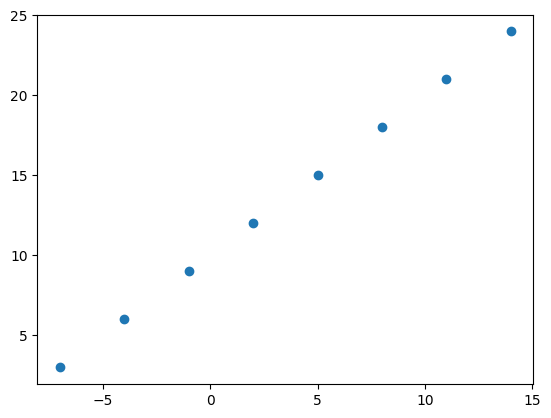

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
house_info = tf.constant(["bedroom", "bathroom", 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [3]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="a_simple_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()
model.fit(X[..., tf.newaxis], y, epochs=100, verbose=0)

Model: "a_simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 89ms/step


array([[30.158512]], dtype=float32)

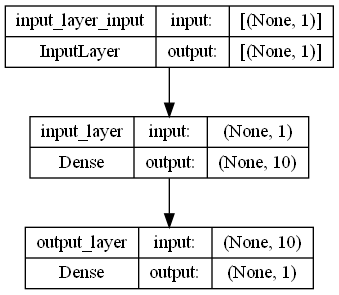

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)